## Configuration and import

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
!pip install pm4py
from google.colab import drive
drive.mount('/content/drive')
!cp /content/drive/MyDrive/trello-logs/CSVs-completos.zip .
!cp /content/drive/MyDrive/trello-logs/bomi.py .
!unzip CSVs-completos.zip

     |████████████████████████████████| 1.8 MB 5.1 MB/s 
  Created wheel for stringdist: filename=StringDist-1.0.9-cp37-cp37m-linux_x86_64.whl size=23595 sha256=6a1b28ac8ffc1360a4a39e7602c28ee7c7cae8fb046f98318da1c6637f132369
  Stored in directory: /root/.cache/pip/wheels/d7/9c/d4/63bc3d8931de0980b9e4a724dea290bb40b8b1b2bd6227c8da
Successfully built stringdist
Mounted at /content/drive
Archive:  CSVs-completos.zip
   creating: CSVs-completos/
  inflating: __MACOSX/._CSVs-completos  
  inflating: CSVs-completos/Merseyside Fire & Rescue Training and Education information trello.csv  
  inflating: __MACOSX/CSVs-completos/._Merseyside Fire & Rescue Training and Education information trello.csv  
  inflating: CSVs-completos/speleo.se.csv  
  inflating: __MACOSX/CSVs-completos/._speleo.se.csv  
  inflating: CSVs-completos/浙江任务.csv  
  inflating: __MACOSX/CSVs-completos/._浙江任务.csv  
  inflating: CSVs-completos/Iishee orooroi.csv  
  inflating: __MACOSX/CSVs-completos/._Iishee orooroi.csv  
  

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import bomi

In [4]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [5]:
import os

all = []
for file in os.listdir("CSVs-completos"):
    df = pd.read_csv(f"CSVs-completos/{file}", index_col=0, parse_dates=["date"], low_memory=False)
    info = bomi.log_info(df)
    

    info['name'] = file
    all.append(info)

result = pd.DataFrame.from_records(pd.json_normalize(all))
result['board_duration'] = (result['ends'] - result['start'])
result.head(10)

,events,attribs,cards,lists,list_first_create,list_last_create,list_renamed,list_closed,start,ends,board_duration,first_event_type,members,card_members_assigned,card_checklists,card_movement,card_closed,card_deleted,card_due,cards_moving_perc,cards_checklist_perc,cards_assigned_perc,cards_closed_perc,name,events_per_member.count,events_per_member.mean,events_per_member.std,events_per_member.min,events_per_member.25%,events_per_member.50%,events_per_member.75%,events_per_member.max
0,751,82,125,6,2016-04-20 02:38:20.951,2018-02-27 00:10:59.887,2,0,2016-04-20 02:35:27.326,2018-06-19 19:33:07.913,790 days 16:57:40.587000,createBoard,4,79,13,114,13,4,53,0.616000,0.104000,0.520000,0.104000,Warframe.csv,4.0,187.750000,35.649918,152.0,171.50,181.0,197.25,237.0
1,690,34,481,1,2021-04-19 14:53:40.466,2021-04-19 14:53:40.466,0,0,2021-04-19 14:53:22.684,2021-09-15 17:27:09.508,149 days 02:33:46.824000,createBoard,1,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,ourdetpasap.csv,1.0,690.000000,NaN,690.0,690.00,690.0,690.00,690.0
2,261,55,35,17,2022-02-20 09:13:56.467,2022-02-20 10:12:05.597,2,11,2022-02-20 09:06:27.097,2022-03-02 12:46:02.926,10 days 03:39:35.829000,copyBoard,1,0,0,9,7,0,0,0.171429,0.000000,0.000000,0.200000,Birbchu's comm queue and prices.csv,1.0,261.000000,NaN,261.0,261.00,261.0,261.00,261.0
3,323,60,155,12,2021-06-20 19:13:09.823,2022-01-15 21:29:36.967,3,2,2021-06-20 19:13:09.304,2022-02-26 14:13:10.883,250 days 19:00:01.579000,createBoard,2,0,1,1,0,11,0,0.006452,0.006452,0.000000,0.000000,Notas Pau&Di.csv,2.0,161.500000,111.015765,83.0,122.25,161.5,200.75,240.0
4,207,34,35,3,2021-08-18 09:28:06.537,2021-08-18 09:28:06.537,0,0,2021-08-18 09:27:40.892,2022-01-18 10:36:11.441,153 days 01:08:30.549000,createBoard,1,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,thingbullrashe.csv,1.0,207.000000,NaN,207.0,207.00,207.0,207.00,207.0
5,284,33,234,22,2015-09-07 21:11:36.448,2016-03-02 15:27:22.644,5,0,2015-09-07 21:11:02.685,2016-03-02 15:27:33.881,176 days 18:16:31.196000,createBoard,1,0,0,1,0,0,0,0.004274,0.000000,0.000000,0.000000,KonMari.csv,1.0,284.000000,NaN,284.0,284.00,284.0,284.00,284.0
6,276,31,66,18,NaT,NaT,0,0,2021-09-21 10:37:31.718,2022-02-20 17:02:45.052,152 days 06:25:13.334000,copyBoard,1,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,flexcedives.csv,1.0,276.000000,NaN,276.0,276.00,276.0,276.00,276.0
7,1064,74,240,17,2022-01-23 14:03:06.808,2022-02-18 01:11:15.271,23,0,2021-04-21 04:51:25.507,2022-03-02 12:16:04.278,315 days 07:24:38.771000,createBoard,3,2,0,46,23,6,0,0.145833,0.000000,0.008333,0.095833,Anime Rifts.csv,3.0,354.666667,379.057164,34.0,145.50,257.0,515.00,773.0
8,403,72,39,10,2020-05-04 14:02:18.720,2021-05-18 09:14:15.384,9,3,2020-05-04 14:00:47.499,2021-05-20 11:46:10.629,380 days 21:45:23.130000,createBoard,5,0,0,7,8,1,0,0.153846,0.000000,0.000000,0.205128,World Bee Day - 20 May.csv,5.0,80.600000,100.842947,4.0,7.00,13.0,166.00,213.0
9,1113,84,222,11,2021-03-11 16:13:43.144,2021-05-04 02:12:46.297,8,0,2021-03-11 16:13:16.342,2021-05-07 06:24:46.287,56 days 14:11:29.945000,createBoard,2,0,13,12,34,0,1,0.045045,0.049550,0.000000,0.153153,Pérola Padilha.csv,2.0,556.500000,535.279833,178.0,367.25,556.5,745.75,935.0


# Individual analysis

#### Board reading

###### The board (https://trello.com/b/NpKEdAgB/wooting-roadmap) represents a software development process in which the users collect the features on the cards, classifying them by their level of completion and indicating their status on the lists. It has been used for more than four years, with more than 1,000 actions over the elements of the board during this time.

In [6]:
df = pd.read_csv(f"CSVs-completos/Wooting roadmap.csv", index_col=0, parse_dates=["date"], low_memory=False)
bomi.enrich_log(df)
begin_end_redesign = bomi.detect_redesign(df, pd.Timedelta('1D'), threshold_l_events=4)
filtered_result = bomi.list_evolution(df, filter_short_lists=pd.Timedelta('30m'))
cl = bomi.connected_lists(df, use='comb', threshold=0)
df.shape

(1048, 78)

#### Evolution of the lists of the board over time (x-axis). Each row represents a list. The vertical lines represent the structural updates (red when it starts and blue when it finishes).


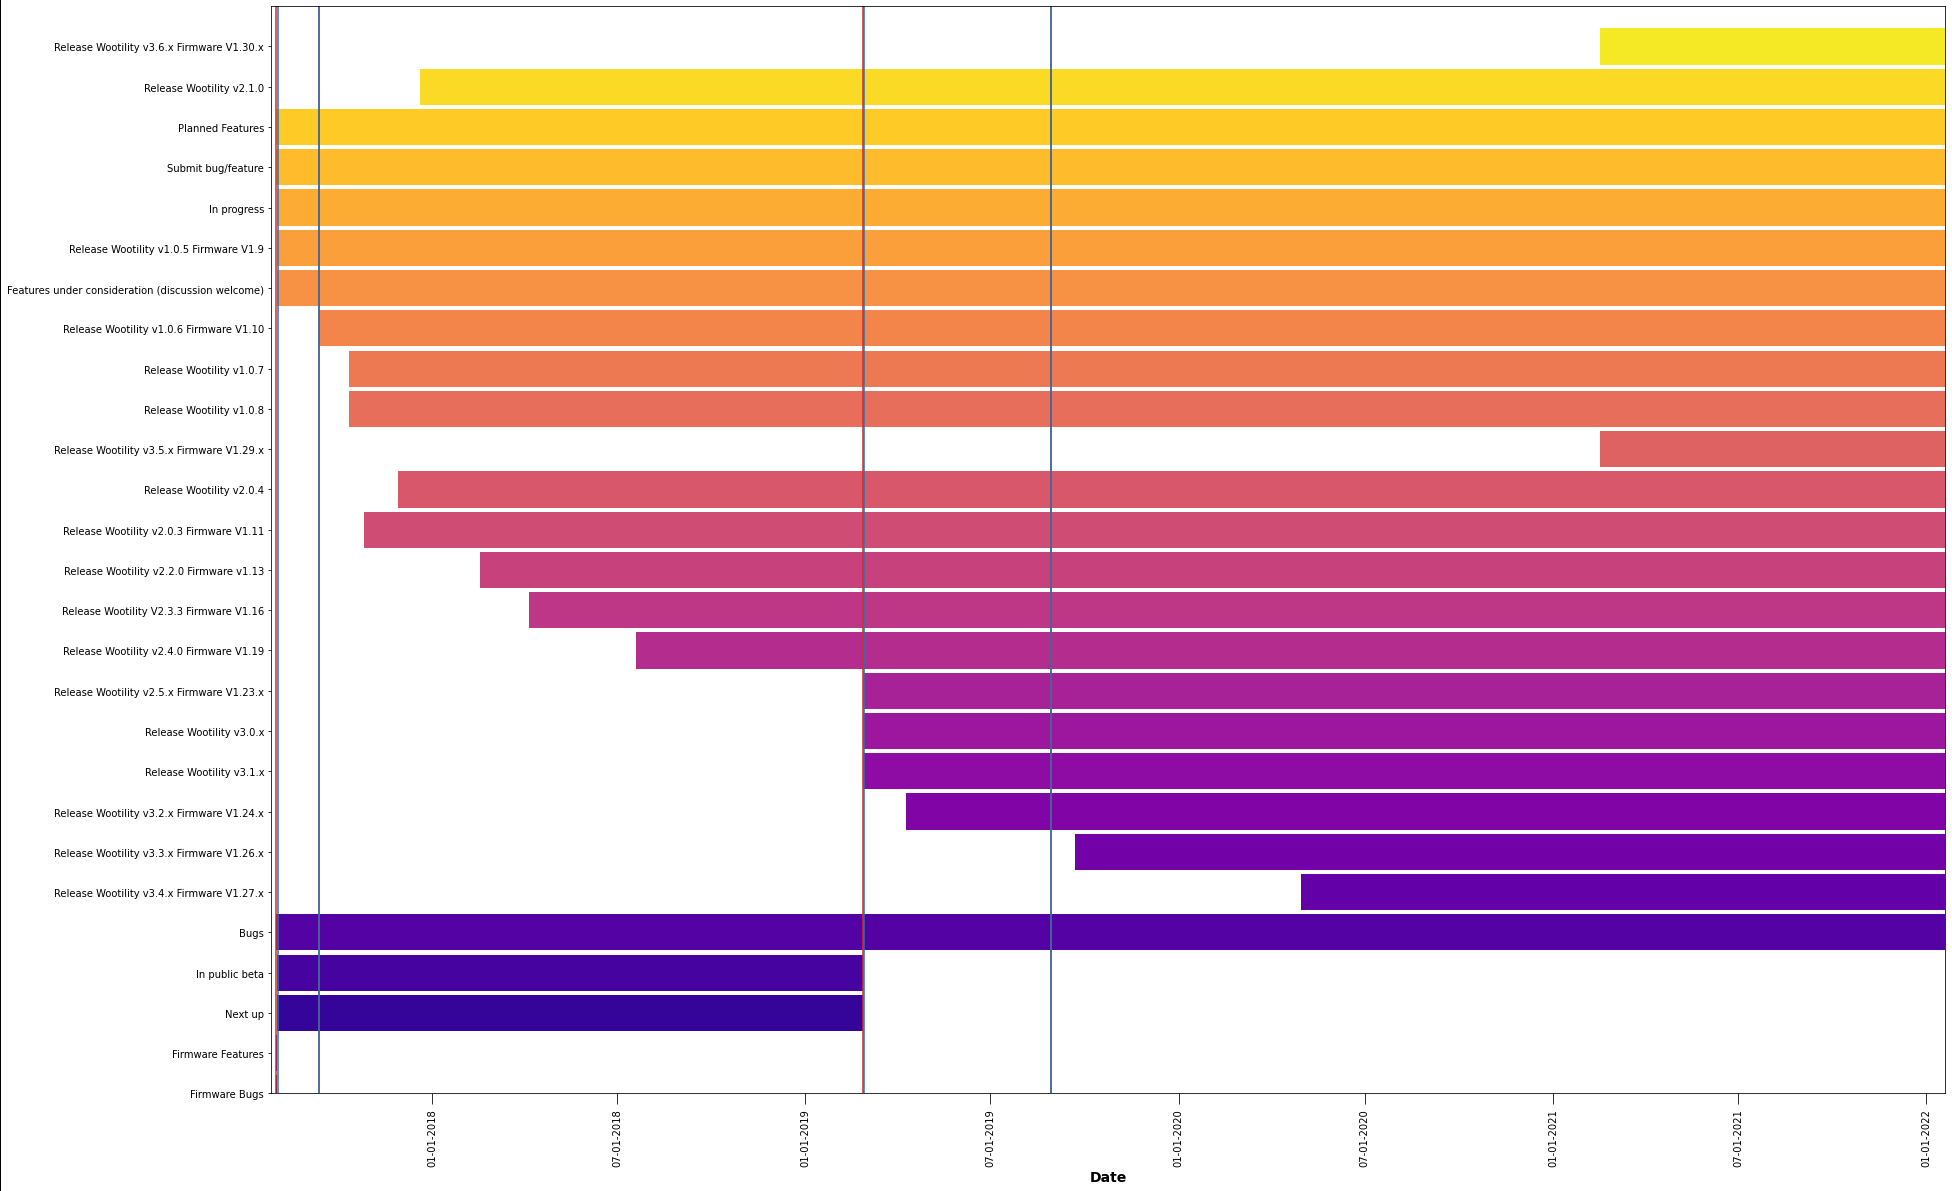

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(30, 20), edgecolor="black", linewidth=1)
bomi.plot_list_diagram(filtered_result, begin_end_redesign, ax)
plt.show()


###### The previous output depicts the list evolution and the structural updates computed with $\theta=24$ hours and $\epsilon = 4$ list events. It shows how the users are continuously creating new lists: one per each new release of their development project. Note that many of these structural changes are not depicted with a vertical line in the figure because the $\epsilon$ threshold requires at least 4 list events within a structural change interval to signal a structural change. This is an example of structural change that represents a regular use of the board, and not a board redesign, since it does not imply a change in the way the board is used or in its purpose. 

However, the figure also depicts a structural change that happened around February 2019 that did involve a board redesign. In particular, lists In public beta and Next up were removed meaning that they simplified their workflow (or at least the parts of their workflow managed by the BBT). In addition, if we check the percentage of cards closed before and after that date, it changes from around 2\% to up to a 20\%, meaning that they also decided to act differently with the cards in that regard.

#### Board discovery: design (lists) and use (create and close cards, flow and semantic precedence)

After understanding the evolution of this board, we now turn our attention to the board design. 

In [8]:
bd = bomi.board_discovery(df, use='id', sp_threshold=0)
bd

{'card_close_list': data.list.id
 Bugs                                                 0.043478
 Planned Features                                     0.086957
 Submit bug/feature                                   0.043478
 Next up                                              0.043478
 In progress                                          0.043478
 Features under consideration (discussion welcome)    0.130435
 In public beta                                       0.043478
 Release Wootility v3.0.x                             0.086957
 Release Wootility v3.2.x Firmware V1.23.x            0.130435
 Release Wootility v3.3.x Firmware V1.26.x            0.260870
 Release Wootility v3.5.x Firmware V1.29.x            0.043478
 Release Wootility v3.6.x Firmware V1.30.x            0.043478
 Name: id, dtype: float64, 'card_create_list': data.list.id
 Bugs                                                 0.26
 Firmware Bugs                                        0.01
 Planned Features                

General metrics of the board use

In [9]:
info = bomi.static_metrics(df, begin_end_redesign)
info

,events,cards,lists,list_num_components,list_connected_size_mean,list_connected_size_mean_perc,list_num_components_move,move_per_list_with_move,list_with_move_perc,cards_moving_perc,moves_per_moving_card,act_per_list,cards_act_perc,act_per_act_card,cards_closed_perc
"(2019-08-29 03:41:26.226000, 2022-01-19 13:31:34.322000]",131,35,10,4,2.50,0.250000,1,5.142857,0.700000,0.400000,1.285714,10.625000,0.600000,4.047619,0.228571
"(2019-02-27 04:04:43.729000, 2019-08-29 03:09:07.916000]",124,42,9,4,2.25,0.250000,1,4.666667,0.666667,0.238095,1.400000,9.375000,0.642857,2.777778,0.190476
"(2017-09-12 08:15:53.432000, 2019-02-26 07:13:23.839000]",272,53,17,4,4.25,0.250000,1,8.571429,0.823529,0.433962,2.608696,16.888889,0.735849,4.102564,0.000000
"(2017-08-03 07:46:28.502000, 2017-09-12 08:15:21.782000]",280,49,9,3,3.00,0.333333,1,20.000000,0.777778,0.571429,2.500000,22.750000,0.938776,4.000000,0.040816


Days between redesigns

In [12]:
days_redesigns = pd.concat([begin_end_redesign['max'], begin_end_redesign['min'].shift(1, fill_value=df['date'].max())], keys=['first', 'last'], axis=1)
days_redesigns

,first,last
4,2019-08-29 03:41:26.226000+00:00,2022-01-19 13:31:34.322000+00:00
6,2019-02-27 04:04:43.729000+00:00,2019-08-29 03:09:07.916000+00:00
14,2017-09-12 08:15:53.432000+00:00,2019-02-26 07:13:23.839000+00:00
15,2017-08-03 07:46:28.502000+00:00,2017-09-12 08:15:21.782000+00:00


Particularly, we focus on the board design from the creation of the board until the redesign that happened in February 2019

In [13]:
df_filter = df[(df["date"] > days_redesigns.iloc[2]['first']) & (df["date"] < days_redesigns.iloc[1]["last"])]
df_filter.shape

(457, 78)

Board discovery (restricted at the cited interval)

In [14]:
bomi.board_discovery(df_filter, use='id')

{'card_close_list': data.list.id
 Features                                     0.153846
 Submit bug/feature                           0.076923
 Next up                                      0.076923
 In progress                                  0.076923
 Under consideration (discussion welcome)     0.153846
 In public beta                               0.076923
 Release Wootility v3.0.x                     0.153846
 Release Wootility v3.2.x Firmware V1.23.x    0.230769
 Name: id, dtype: float64, 'card_create_list': data.list.id
 Bugs                                         0.190476
 Features                                     0.071429
 Next up                                      0.047619
 In progress                                  0.214286
 Under consideration (discussion welcome)     0.095238
 In public beta                               0.047619
 Release Wootility v1.0.8                     0.023810
 Release Wootility v2.0.4                     0.023810
 NaN                       

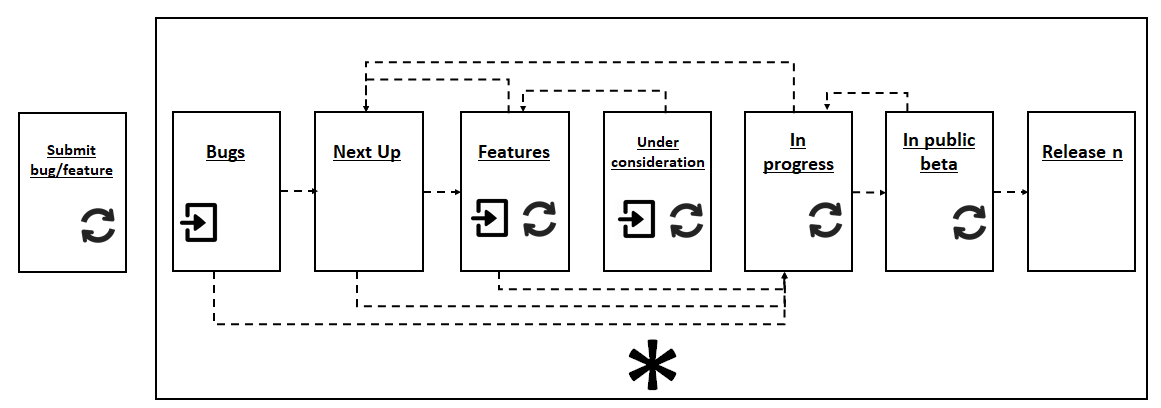

The previous figure shows the board design discovered represented using the notation introduced in (https://idus.us.es/bitstream/handle/11441/130957/Pe%c3%b1a2021_Chapter_DesignPatternsForBoard-BasedCo.pdf?sequence=1&isAllowed=y). 

For simplicity, all release lists have been represented together in one unique list called Release n. The thresholds used for semantic precedence is $\lambda=0.025$, and for card creation and update is $0.10$. We do not depict card closure because less than 2\% of the cards of the board are closed.

The diagram shows that cards flow between all the lists of the board except for list Submit bug/feature, whose cards are not moved from or to any other list of the board. The reason is that the way this is implemented in the board is that users submit bugs or features not as new cards, but as comments in one of the predefined cards of the list. This manifests in the fact that this list has a high level of card updates.

If we turn our attention now to the other lists, we can see how the creation of cards takes place in lists Bugs, Features or Under consideration, as appropriate. Then, some of them pass to Next up when they are scheduled to be included in the next release, while others directly go to In progress list, when the corresponding feature/bug is being developed/fixed. After this phase, most of the cards go to In public beta, but some other cards have to go back to Next-up (those cards which do not have been finished for the corresponding release). Finally, cards move to their corresponding Release list, once they are developed. This behaviour fits with a Kanban or Information Lifecycle pattern. 